In [87]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
con = sqlite3.connect('../../datasets/checking-logs.sqlite')

## run a query that gets the `datetime` from the `pageviews` table, selecting only the `users` and not the `admins`

In [88]:
df = pd.read_sql_query(
    '''
    SELECT 
        uid,
        timestamp,
        numTrials
    FROM checker
    WHERE 
        uid LIKE 'user_%'
        AND status = 'ready'
        AND labname = 'project1'
    ''',
    con,
    parse_dates=['timestamp'],
)

df

,uid,timestamp,numTrials
0,user_4,2020-04-17 05:19:02.744528,1
1,user_4,2020-04-17 05:22:45.549397,2
2,user_4,2020-04-17 05:34:24.422370,3
3,user_4,2020-04-17 05:43:27.773992,4
4,user_4,2020-04-17 05:46:32.275104,5
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,26
947,user_19,2020-05-15 10:22:46.248162,27
948,user_19,2020-05-15 10:23:18.043212,28
949,user_28,2020-05-15 10:38:14.430013,27


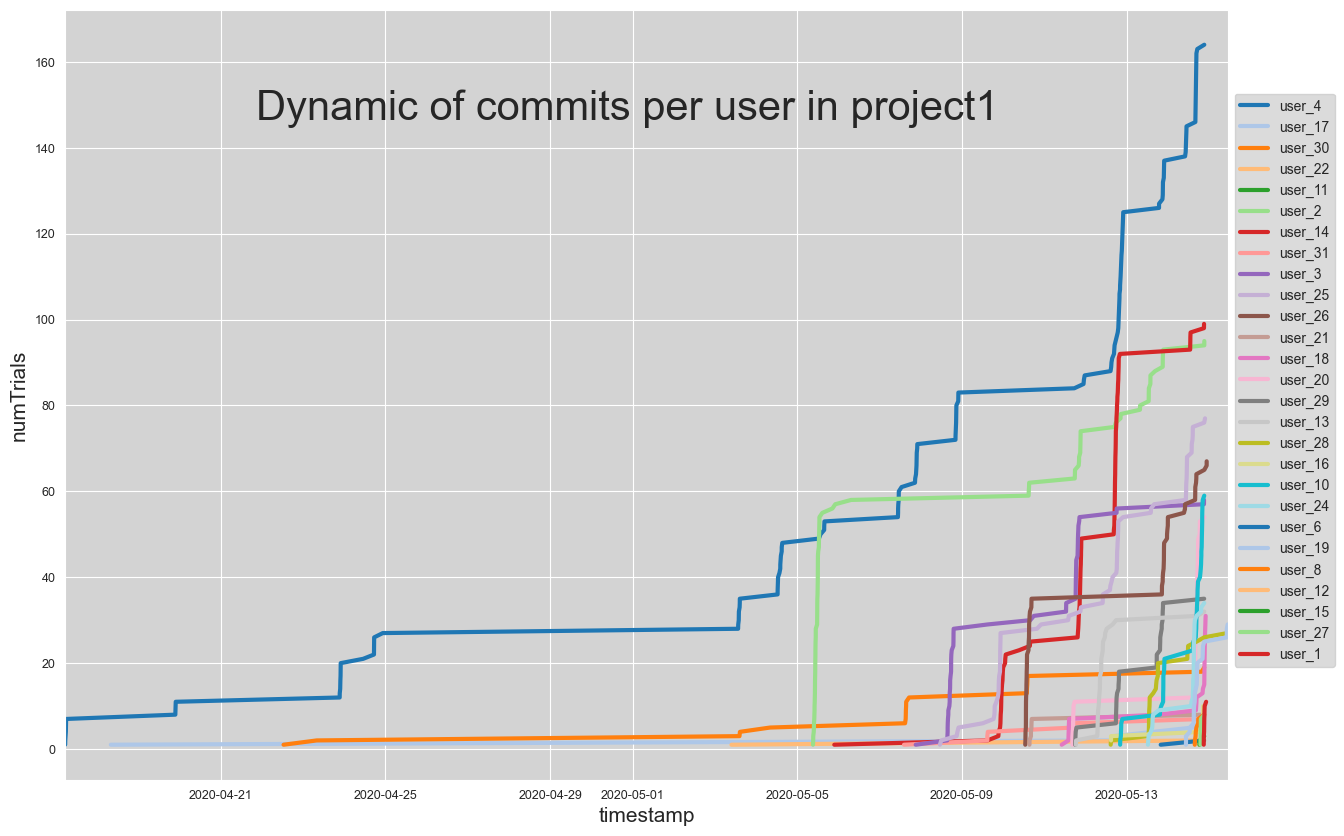

In [89]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid", {'axes.facecolor': 'lightgray'})
sns.lineplot(
    data=df,
    x='timestamp',
    y='numTrials',
    hue='uid',
    palette='tab20',
    linewidth=3,
    sort=True,
)
plt.legend(bbox_to_anchor=(1, 0.9), loc=2)
plt.grid(True)
plt.suptitle('Dynamic of commits per user in project1', fontsize=30, y= 0.8)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)


plt.xlabel('timestamp',fontsize=15)
plt.ylabel('numTrials',fontsize=15)

plt.xlim(df['timestamp'].min(), df['timestamp'].max())

plt.show()

## Which user was the leader in the number of commits almost all of the time?
* user_4
## Which user was the leader for only a short period of time?
* user_2

In [90]:
con.close()